# Census Data Analysis
This code organizes some analysis of the 2010 US census data and visualizations for the initial presentation.

In [151]:
# Packages
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [114]:
# Ingest the data -- special handling needed to convert numbers into integers
data_folder = ""
census_data = pd.read_csv(f"{data_folder}merged_census_county_data.csv", thousands=',')
census_data['county_name'] = census_data['county_name'].apply(lambda x: x.split(' County')[0])
census_data.head()

,FIPS_Code,state_code,county_name,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1001,AL,Autauga,0.0,54571,54597,54773,55227,54954,54727,...,26281,25561,720,2.7,25838.0,24576.0,1262.0,4.9,58233.0,112.5
1,1003,AL,Baldwin,5.0,182265,182265,183112,186558,190145,194885,...,97424,94713,2711,2.8,96763.0,91338.0,5425.0,5.6,59871.0,115.6
2,1005,AL,Barbour,3.0,27457,27455,27327,27341,27169,26937,...,8502,8177,325,3.8,8587.0,7982.0,605.0,7.0,35972.0,69.5
3,1007,AL,Bibb,0.0,22915,22915,22870,22745,22667,22521,...,8639,8371,268,3.1,8640.0,8067.0,573.0,6.6,47918.0,92.6
4,1009,AL,Blount,0.0,57322,57322,57376,57560,57580,57619,...,25196,24516,680,2.7,24661.0,23653.0,1008.0,4.1,52902.0,102.2


In [186]:
# Correlation of population changes in Texas for areas around Austin, Houston, and San Antonio
filter_column = 'county_name'
filter_values = ['Travis','Houston','Bexar']
field = 'POP_ESTIMATE'

plot_data = census_data[census_data[filter_column].isin(list(filter_values))] \
    .filter(regex='^' + field + '_.*$',axis=1).transpose()
plot_data.reset_index(inplace=True)
plot_data['index'] = pd.to_datetime(plot_data['index'].apply(lambda x: '1/1/' + x.split('_')[-1]))
plot_data.set_index('index', inplace=True)
plot_data.index.rename('Year',inplace=True)

corr = plot_data.pct_change(periods=1).iloc[1:].corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2) \
    .set_caption('Correlation of annual population movements across major Texas population centers')

,34,447,1324,2450,2518,2616,2730
34,1,0.4,-0.32,0.13,-0.27,-0.44,0.46
447,0.4,1,-0.4,0.098,-0.3,-0.25,0.2
1324,-0.32,-0.4,1,-0.29,-0.25,0.21,-0.43
2450,0.13,0.098,-0.29,1,-0.45,0.5,-0.25
2518,-0.27,-0.3,-0.25,-0.45,1,-0.25,0.68
2616,-0.44,-0.25,0.21,0.5,-0.25,1,-0.51
2730,0.46,0.2,-0.43,-0.25,0.68,-0.51,1


Text(0.5, 1.0, 'Median household income for 2019 by FIPS code')

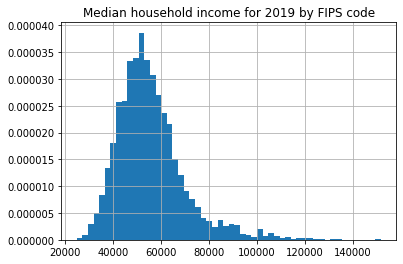

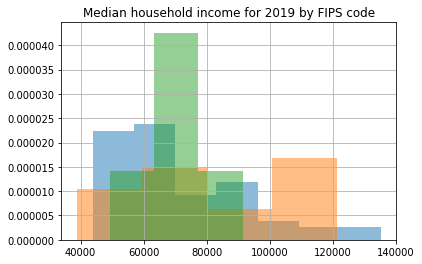

In [185]:
# Pooled density of education level across the country -- idea is that there may be distinct clusters
def pd_hist(data, hist_args=dict()):
    hist_args.update({'density': True})
    n_bins = int(np.sqrt(len(np.unique(data.dropna().values))))
    data.hist(bins=n_bins, **hist_args)
    return

plt.figure()
pd_hist(census_data['Median_Household_Income_2019'])
plt.title('Median household income for 2019 by FIPS code')

plt.figure()
pd_hist(census_data[census_data['state_code'].isin(['CA'])]['Median_Household_Income_2019'],{'alpha':0.5})
pd_hist(census_data[census_data['state_code'].isin(['MD'])]['Median_Household_Income_2019'],{'alpha':0.5})
pd_hist(census_data[census_data['state_code'].isin(['NH'])]['Median_Household_Income_2019'],{'alpha':0.5})
plt.title('Median household income for 2019 by FIPS code')

Text(0.5, 1.0, 'Cumulative domestic migration by 2019 income quintile')

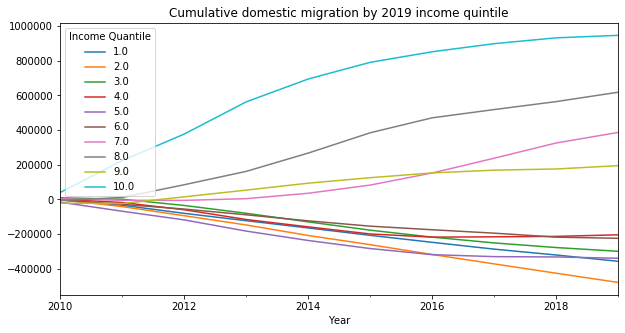

In [276]:
# Correlation of population changes in Texas for areas around Austin, Houston, and San Antonio
plot_data = census_data
n_buckets = 10
plot_data['Income Quantile'] = pd.qcut(census_data['Median_Household_Income_2019'].values, n_buckets).codes+1
plot_data = plot_data[plot_data['Income Quantile']>0]

plot_data = pd.concat((plot_data['Income Quantile'], census_data\
    .filter(regex='^DOMESTIC_MIG_.*$')),axis=1)
plot_data = plot_data.groupby('Income Quantile').sum().transpose().cumsum()
plot_data.reset_index(inplace=True)
plot_data['index'] = pd.to_datetime(plot_data['index'].apply(lambda x: '1/1/' + x.split('_')[-1]))
plot_data.set_index('index', inplace=True)
plot_data.index.rename('Year',inplace=True)
plot_data.plot(figsize=(10,5))
plt.title('Cumulative domestic migration by 2019 income quintile')

In [243]:
[print(c) for c in census_data.columns]

FIPS_Code
state_code
county_name
Economic_typology_2015
CENSUS_2010_POP
ESTIMATES_BASE_2010
POP_ESTIMATE_2010
POP_ESTIMATE_2011
POP_ESTIMATE_2012
POP_ESTIMATE_2013
POP_ESTIMATE_2014
POP_ESTIMATE_2015
POP_ESTIMATE_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
POP_ESTIMATE_2019
N_POP_CHG_2010
N_POP_CHG_2011
N_POP_CHG_2012
N_POP_CHG_2013
N_POP_CHG_2014
N_POP_CHG_2015
N_POP_CHG_2016
N_POP_CHG_2017
N_POP_CHG_2018
N_POP_CHG_2019
Births_2010
Births_2011
Births_2012
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Births_2019
Deaths_2010
Deaths_2011
Deaths_2012
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
Deaths_2019
NATURAL_INC_2010
NATURAL_INC_2011
NATURAL_INC_2012
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
NATURAL_INC_2017
NATURAL_INC_2018
NATURAL_INC_2019
INTERNATIONAL_MIG_2010
INTERNATIONAL_MIG_2011
INTERNATIONAL_MIG_2012
INTERNATIONAL_MIG_2013
INTERNATIONAL_MIG_2014
INTERNATIONAL_MIG_2015
INTERNATIONAL_MIG_2016
INTERNA

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,